Metadados disponibilidados no Hackathon da CPNatal

In [69]:
import pandas as pd

df_metadados = pd.read_csv('Metadados.csv', sep=',', encoding='latin1')
print(df_metadados.shape)

(61849, 11)


In [70]:
df_metadados.head()

,Nr. Processo,Assunto,Vara,Parte Autora,Parte Ré,Classe Processual,Advogado,Magistrado no momento da distribuição,Procedente ou Improcedente(P/I),Se teve tutela,Unnamed: 10
0,0802150-63.2017.4.05.8401,Unidade de terapia intensiva (UTI) ou unidade...,10ª VARA FEDERAL,GILDAZIO BATISTA TORRES ...,UNIÃO FEDERAL ...,PROCEDIMENTO COMUM ...,- ...,LAURO HENRIQUE LOBO BANDEIRA,-,S,NaN
1,0801367-08.2016.4.05.8401,Dívida Ativa ...,10ª VARA FEDERAL,FAZENDA NACIONAL ...,JOSEFA GIRLENE FERREIRA DA SILVA ...,EXECUÇÃO FISCAL ...,- ...,LAURO HENRIQUE LOBO BANDEIRA,-,N,NaN
2,0000873-39.2003.4.05.8400,Honorários Periciais ...,10ª VARA FEDERAL,UNIÃO FEDERAL ...,ANTONIO BATISTA DE ARAUJO - EPP ...,CUMPRIMENTO DE SENTENÇA ...,ANTONIO ROBERTO FERNANDES TARGINO ...,LAURO HENRIQUE LOBO BANDEIRA,-,N,NaN
3,0808847-40.2016.4.05.8400,Financiamento Público da Educação e/ou Pesqui...,10ª VARA FEDERAL,MARA LIGIA DE GOIS FERREIRA ...,FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO...,MANDADO DE SEGURANÇA ...,MARILIA MESQUITA DE GOIS ...,LAURO HENRIQUE LOBO BANDEIRA,-,S,NaN
4,0801382-40.2017.4.05.8401,Abatimento proporcional do preço ...,10ª VARA FEDERAL,ANTONIO CARLOS DA SILVA ...,CAIXA ECONOMICA FEDERAL - CEF ...,PROCEDIMENTO COMUM ...,JOSÉ ABRANTES LACERDA SEGUNDO ...,LAURO HENRIQUE LOBO BANDEIRA,-,S,NaN


In [71]:
# removendo os espaços do começo e do final das colunas
df_metadados.columns = df_metadados.columns.str.strip()
colunas = df_metadados.columns

Vara
13ª VARA FEDERAL                                      2
Tecidos e Partes do Corpo Humano                      2
14ª VARA FEDERAL                                      3
CORREGEDORIA JUDICIAL DA PENITENCIÁRIA FEDERAL        4
2ª VARA FEDERAL                                      20
12ª VARA FEDERAL                                   1410
15ª VARA FEDERAL                                   1791
11ª VARA FEDERAL                                   2249
9ª VARA FEDERAL                                    2741
8ª VARA FEDERAL                                    3822
10ª VARA FEDERAL                                   4369
4ª VARA FEDERAL                                   10464
5ª VARA FEDERAL                                   10745
1ª VARA FEDERAL                                   10802
6ª VARA FEDERAL                                   13421
Name: Nr. Processo, dtype: int64


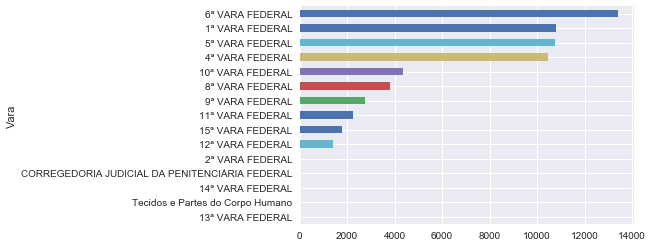

In [72]:
# calculando a quantidade de processos por vara
size = df_metadados.groupby(colunas[2])[colunas[0]].nunique()
size = size.sort_values()
size.index = size.index.str.strip()
print(size)
size.plot(kind='barh')

In [73]:
# verificando as colunas
colunas = df_metadados.columns
print(colunas)
# pegando os valores únicos da coluna Vara e adicionando em rotulos
print(df_metadados[colunas[2]].unique())
# retira os vazios, retira os espacos do comeco e fim e pega os valores unicos
rotulos = df_metadados[colunas[2]].dropna().str.strip().unique()
rotulos

Index(['Nr. Processo', 'Assunto', 'Vara', 'Parte Autora', 'Parte Ré',
       'Classe Processual', 'Advogado',
       'Magistrado no momento da distribuição',
       'Procedente ou Improcedente(P/I)', 'Se teve tutela', 'Unnamed: 10'],
      dtype='object')
[' 10ª VARA FEDERAL                               ' nan
 ' 11ª VARA FEDERAL                               '
 ' 12ª VARA FEDERAL                               '
 ' 13ª VARA FEDERAL                               '
 ' 14ª VARA FEDERAL                               '
 ' 15ª VARA FEDERAL                               '
 ' 1ª VARA FEDERAL                                '
 ' 2ª VARA FEDERAL                                '
 ' 4ª VARA FEDERAL                                '
 ' 5ª VARA FEDERAL                                '
 ' Tecidos e Partes do Corpo Humano                                                          '
 ' 6ª VARA FEDERAL                                '
 ' 8ª VARA FEDERAL                                '
 ' 9ª VARA FEDERAL   

array(['10ª VARA FEDERAL', '11ª VARA FEDERAL', '12ª VARA FEDERAL',
       '13ª VARA FEDERAL', '14ª VARA FEDERAL', '15ª VARA FEDERAL',
       '1ª VARA FEDERAL', '2ª VARA FEDERAL', '4ª VARA FEDERAL',
       '5ª VARA FEDERAL', 'Tecidos e Partes do Corpo Humano',
       '6ª VARA FEDERAL', '8ª VARA FEDERAL', '9ª VARA FEDERAL',
       'CORREGEDORIA JUDICIAL DA PENITENCIÁRIA FEDERAL'], dtype=object)

In [74]:
# retirar coluna vazia, [ultima coluna]
df_metadados = df_metadados.drop(columns=colunas[-1])

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

magistrados = df_metadados.groupby('Magistrado no momento da distribuição')[colunas[0]].nunique()
magistrados9 = magistrados.sort_values(ascending=False)[:9]
magistrados1 = magistrados.sort_values(ascending=False)[10:].sum()

In [76]:
magistrados1 = pd.Series(magistrados1, index=['Outros'])
magistrados10 = pd.concat([magistrados9, magistrados1])

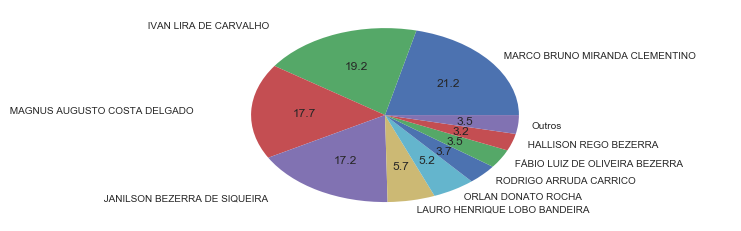

In [77]:
sns.set()

fig1, ax1 = plt.subplots()
ax1.pie(magistrados10.values, labels=magistrados10.index, autopct='%1.1f')

plt.show()

In [78]:
# limpa todos os espacos vazios das colunas
df_metadados_clean = df_metadados.apply(lambda x: x.str.strip())

In [79]:
resumo1 = df_metadados_clean.pivot_table(index=['Vara', 'Magistrado no momento da distribuição'], columns=['Se teve tutela'], aggfunc='count'
                                        , values='Nr. Processo', fill_value=0)

In [80]:
resumo1.sort_values('S')

Se teve tutela                                                                              -  \
Vara                                           Magistrado no momento da distribuição            
Tecidos e Partes do Corpo Humano               VICENTE JOSE AUGUSTO JUNIOR                  1   
2ª VARA FEDERAL                                WALTER NUNES DA SILVA JUNIOR                 0   
9ª VARA FEDERAL                                FRANCISCO BARROS DIAS                        0   
14ª VARA FEDERAL                               FRANCISCO EDUARDO GUIMARAES FARIAS           0   
12ª VARA FEDERAL                               ANDRE DIAS FERNANDES                         0   
Tecidos e Partes do Corpo Humano               LUCIANA CALEGARI BORGES                      1   
9ª VARA FEDERAL                                ORLAN DONATO ROCHA                           0   
                                               VINICIUS COSTA VIDOR                         0   
13ª VARA FEDERAL                               MARIA JULIA TAVARES DO CARMO PINHEIRO NUNES  0   
12ª VARA FEDERAL                               MARCO BRUNO MIRANDA CLEMENTINO               0   
CORREGEDORIA JUDICIAL DA PENITENCIÁRIA FEDERAL WALTER NUNES DA SILVA JUNIOR                 0   
9ª VARA FEDERAL                                LEOPOLDO FONTENELE TEIXEIRA                  0   
                                               HALLISON REGO BEZERRA                        0   
8ª VARA FEDERAL                                ANDRE DIAS FERNANDES                         0   
                                               LAURO HENRIQUE LOBO BANDEIRA                 0   
9ª VARA FEDERAL                                JANINE DE MEDEIROS SOUZA BEZERRA             0   
10ª VARA FEDERAL                               LEOPOLDO FONTENELE TEIXEIRA                  0   
6ª VARA FEDERAL                                SOPHIA NOBREGA CAMARA LIMA                   0   
9ª VARA FEDERAL                                MONIKY MAYARA COSTA FONSECA                  0   
6ª VARA FEDERAL                                JAILSOM LEANDRO DE SOUSA                     0   
10ª VARA FEDERAL                               SOPHIA NOBREGA CAMARA LIMA                   0   
12ª VARA FEDERAL                               HALLISON REGO BEZERRA                        0   
9ª VARA FEDERAL                                SOPHIA NOBREGA CAMARA LIMA                   0   
10ª VARA FEDERAL                               EMANUELA MENDONCA SANTOS BRITO               0   
12ª VARA FEDERAL                               KEPLER GOMES RIBEIRO                         0   
10ª VARA FEDERAL                               CINTIA MENEZES BRUNETTA                      0   
12ª VARA FEDERAL                               IVAN LIRA DE CARVALHO                        0   
8ª VARA FEDERAL                                NEWTON FLADSTONE BARBOSA DE MOURA            0   
11ª VARA FEDERAL                               RODRIGO ARRUDA CARRICO                       0   
9ª VARA FEDERAL                                FÁBIO LUIZ DE OLIVEIRA BEZERRA               0   
15ª VARA FEDERAL                               HALLISON REGO BEZERRA                        0   
6ª VARA FEDERAL                                MARCO BRUNO MIRANDA CLEMENTINO               0   
10ª VARA FEDERAL                               LAURO HENRIQUE LOBO BANDEIRA                 0   
8ª VARA FEDERAL                                ORLAN DONATO ROCHA                           0   
1ª VARA FEDERAL                                MAGNUS AUGUSTO COSTA DELGADO                 0   
5ª VARA FEDERAL                                IVAN LIRA DE CARVALHO                        0   
4ª VARA FEDERAL                                JANILSON BEZERRA DE SIQUEIRA                 0   

Se teve tutela                                                                                  N  \
Vara                                           Magistrado no momento da distribuição                
Tecidos e Part

In [81]:
resumo2 = df_metadados_clean.pivot_table(index=['Vara', 'Magistrado no momento da distribuição'], columns=['Procedente ou Improcedente(P/I)'], aggfunc='count'
                                        , values='Nr. Processo', fill_value=0)

In [82]:
resumo2.drop(columns=['IVAN LIRA DE CARVALHO', 'ORLAN DONATO ROCHA'])

Procedente ou Improcedente(P/I)                                                                 -  \
Vara                                           Magistrado no momento da distribuição                
10ª VARA FEDERAL                               CINTIA MENEZES BRUNETTA                        382   
                                               EMANUELA MENDONCA SANTOS BRITO                 144   
                                               LAURO HENRIQUE LOBO BANDEIRA                  3088   
                                               LEOPOLDO FONTENELE TEIXEIRA                     31   
                                               SOPHIA NOBREGA CAMARA LIMA                     134   
11ª VARA FEDERAL                               RODRIGO ARRUDA CARRICO                        1896   
12ª VARA FEDERAL                               ANDRE DIAS FERNANDES                             3   
                                               HALLISON REGO BEZERRA                           80   
                                               IVAN LIRA DE CARVALHO                          808   
                                               KEPLER GOMES RIBEIRO                           286   
                                               MARCO BRUNO MIRANDA CLEMENTINO                   1   
13ª VARA FEDERAL                               MARIA JULIA TAVARES DO CARMO PINHEIRO NUNES      2   
14ª VARA FEDERAL                               FRANCISCO EDUARDO GUIMARAES FARIAS               2   
15ª VARA FEDERAL                               HALLISON REGO BEZERRA                         1543   
1ª VARA FEDERAL                                MAGNUS AUGUSTO COSTA DELGADO                  8721   
2ª VARA FEDERAL                                WALTER NUNES DA SILVA JUNIOR                    20   
4ª VARA FEDERAL                                JANILSON BEZERRA DE SIQUEIRA                  8156   
5ª VARA FEDERAL                                IVAN LIRA DE CARVALHO                         8333   
6ª VARA FEDERAL                                JAILSOM LEANDRO DE SOUSA                       147   
                                               MARCO BRUNO MIRANDA CLEMENTINO               12504   
                                               SOPHIA NOBREGA CAMARA LIMA                     241   
8ª VARA FEDERAL                                ANDRE DIAS FERNANDES                            10   
                                               LAURO HENRIQUE LOBO BANDEIRA                    15   
                                               NEWTON FLADSTONE BARBOSA DE MOURA              474   
                                               ORLAN DONATO ROCHA                            2742   
9ª VARA FEDERAL                                FRANCISCO BARROS DIAS                            4   
                                               FÁBIO LUIZ DE OLIVEIRA BEZERRA                1743   
                                               HALLISON REGO BEZERRA                            6   
                                               JANINE DE MEDEIROS SOUZA BEZERRA                82   
                                               LEOPOLDO FONTENELE TEIXEIRA                     12   
                                               MONIKY MAYARA COSTA FONSECA                     64   
                                               ORLAN DONATO ROCHA                               1   
                                               SOPHIA NOBREGA CAMARA LIMA                     352   
                                               VINICIUS COSTA VIDOR                             6   
CORREGEDORIA JUDICIAL DA PENITENCIÁRIA FEDERAL WALTER NUNES DA SILVA JUNIOR                     2   
Tecidos e Partes do Corpo Humano               LUCIANA CALEGARI BORGES                          0   
                                               VICENTE JOSE AUGUSTO JUNIOR                      0   

Procedente ou Improcedente(P/I)                             

In [83]:
df_metadados_clean = df_metadados_clean.drop([2838, 4248, 42788])

In [113]:
df_metadados_clean = df_metadados_clean.drop([61845])

In [114]:
df_metadados_clean = df_metadados_clean.reset_index(drop=True)

## Filtragem dos dados

- Adiconar aos metadados os conteúdos das sentenças e petições; 
- e retirar os processos que não possuem senteça.

In [120]:
from io import StringIO
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from re import sub
from sys import argv, exit
import getopt, os

def convertPdfToText(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

def parseText( text ):
    parsed = sub( r'[ \t\r\f\v]+', ' ', text )      # remove múltiplos caracteres não imprimíveis
    parsed = sub( r'\n[ \t\r\f\v]', '', parsed )    # remove espaços no início da linha
    parsed = sub( r'\n+([a-z])', '\1', parsed )     # remove novas linhas dentro de um parágrafo
    parsed = sub( r'\n{2,}', '\n', parsed )         # remove múltiplas novas linhas
    return parsed

def usage():
    print( "Script para converter um PDF em um texto (ou arquivo de texto)")
    print( "Uso:\n\t" + os.path.basename(argv[0]) + " [-o] [-h] ARQUIVO" )
    print( "Argumentos opcionais:" )
    print( "\t-o, --output\tEspecifica que o texto será enviado para STDOUT" )
    print( "\t-h, --help\tMostra essa mensagem e sai" )

peticao = []
for i in df_metadados_clean['Nr. Processo']:
#     print('extraindo', i)
    if(len(i)>25):
        peticao.append('')
    else:
        pdfFile = 'peticao/'+i+'.pdf'
        fullDoc = parseText( convertPdfToText( pdfFile ) )
        peticao.append(fullDoc)



In [124]:
sentenca = []
for i in df_metadados_clean['Nr. Processo']:
#     print('extraindo', i)
    if(len(i)>25):
        sentenca.append('')
    else:
        try:
            pdfFile = 'sentenca/'+i+'.pdf'
            fullDoc = parseText( convertPdfToText( pdfFile ) )
            sentenca.append(fullDoc)
        except:
            sentenca.append('Sem sentença')

In [125]:
s_peticao = pd.Series(peticao)
s_sentenca = pd.Series(sentenca)

In [126]:
df_metadados_clean['peticao'] = s_peticao
df_metadados_clean['sentenca'] = s_sentenca

In [127]:
df_metadados_clean.head()

,Nr. Processo,Assunto,Vara,Parte Autora,Parte Ré,Classe Processual,Advogado,Magistrado no momento da distribuição,Procedente ou Improcedente(P/I),Se teve tutela,peticao,sentenca
0,0802150-63.2017.4.05.8401,Unidade de terapia intensiva (UTI) ou unidade ...,10ª VARA FEDERAL,GILDAZIO BATISTA TORRES,UNIÃO FEDERAL,PROCEDIMENTO COMUM,-,LAURO HENRIQUE LOBO BANDEIRA,-,S,AO JUÍZO DA ____ VARA FEDERAL DA SUBSEÇÃO JUDI...,PROCESSO Nº: 0802150-63.2017.4.05.8401 - PROCE...
1,0801367-08.2016.4.05.8401,Dívida Ativa,10ª VARA FEDERAL,FAZENDA NACIONAL,JOSEFA GIRLENE FERREIRA DA SILVA,EXECUÇÃO FISCAL,-,LAURO HENRIQUE LOBO BANDEIRA,-,N,Procuradoria-Geral da Fazenda Nacional\nProcur...,Sem sentença
2,0000873-39.2003.4.05.8400,Honorários Periciais,10ª VARA FEDERAL,UNIÃO FEDERAL,ANTONIO BATISTA DE ARAUJO - EPP,CUMPRIMENTO DE SENTENÇA,ANTONIO ROBERTO FERNANDES TARGINO,LAURO HENRIQUE LOBO BANDEIRA,-,N,TRIBUNAL REGIONAL FEDERAL DA 5ª REGIÃO\n10° VA...,Sem sentença
3,0808847-40.2016.4.05.8400,Financiamento Público da Educação e/ou Pesquisa,10ª VARA FEDERAL,MARA LIGIA DE GOIS FERREIRA,FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO,MANDADO DE SEGURANÇA,MARILIA MESQUITA DE GOIS,LAURO HENRIQUE LOBO BANDEIRA,-,S,MANDADO DE SEGURANÇA EM PDF\n,PROCESSO Nº: 0808847-40.2016.4.05.8400 - MANDA...
4,0801382-40.2017.4.05.8401,Abatimento proporcional do preço,10ª VARA FEDERAL,ANTONIO CARLOS DA SILVA,CAIXA ECONOMICA FEDERAL - CEF,PROCEDIMENTO COMUM,JOSÉ ABRANTES LACERDA SEGUNDO,LAURO HENRIQUE LOBO BANDEIRA,-,S,ANEXOS!\n,Sem sentença


In [129]:
df_metadados_clean.to_csv('metadados_completo_utf8.csv', encoding='utf-8')

In [131]:
df_metadados_clean.shape

(61845, 12)

In [133]:
df_metadados_clean[df_metadados_clean['sentenca']!='Sem sentença'].shape

(28406, 12)

In [143]:
df_metadados_relevante = df_metadados_clean[df_metadados_clean['sentenca']!='Sem sentença']
df_metadados_relevante = df_metadados_relevante.drop([61842, 61843, 61844, 39425, 58147])
df_metadados_relevante = df_metadados_relevante.reset_index(drop=True)

In [158]:
resumo_magistrados = df_metadados_relevante.pivot_table(index=['Magistrado no momento da distribuição'], aggfunc='count'
                                        , values='Nr. Processo', fill_value=0)
resumo_magistrados.sort_values(by='Nr. Processo', ascending=False)

,Nr. Processo
Magistrado no momento da distribuição,
IVAN LIRA DE CARVALHO,7106
JANILSON BEZERRA DE SIQUEIRA,5968
MAGNUS AUGUSTO COSTA DELGADO,5776
MARCO BRUNO MIRANDA CLEMENTINO,2573
ORLAN DONATO ROCHA,1329
LAURO HENRIQUE LOBO BANDEIRA,1288
FÁBIO LUIZ DE OLIVEIRA BEZERRA,1082
RODRIGO ARRUDA CARRICO,859
HALLISON REGO BEZERRA,811


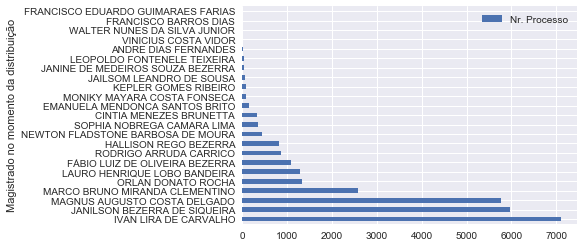

In [162]:
resumo_magistrados.sort_values(by='Nr. Processo', ascending=False).plot(kind='barh')

In [148]:
resumo_new = df_metadados_relevante.pivot_table(index=['Vara'], columns=['Se teve tutela'], aggfunc='count'
                                        , values='Nr. Processo', fill_value=0)

In [149]:
resumo_new

Se teve tutela,N,S
Vara,,
10ª VARA FEDERAL,822,1069
11ª VARA FEDERAL,550,309
12ª VARA FEDERAL,427,312
14ª VARA FEDERAL,1,0
15ª VARA FEDERAL,436,244
1ª VARA FEDERAL,3094,2682
2ª VARA FEDERAL,3,0
4ª VARA FEDERAL,2926,3042
5ª VARA FEDERAL,3576,2993


In [156]:
df_metadados_relevante.shape

(28401, 12)